In [13]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.neural_network import MLPClassifier
from sklearn.cluster import KMeans
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [14]:
# Load the data
train_df = pd.read_csv('mnist_train.csv')
test_df = pd.read_csv('mnist_test.csv')

In [15]:
# Prepare the data
X_train = train_df.drop('label', axis=1) / 255.0
y_train = train_df['label']
X_test = test_df.drop('label', axis=1) / 255.0
y_test = test_df['label']

In [16]:
# Split the training data for validation
X_train_split, X_val, y_train_split, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

In [17]:
# Initialize models
models = {
    'Logistic Regression': LogisticRegression(max_iter=1000),
    'ANN (MLP)': MLPClassifier(hidden_layer_sizes=(128, 64), max_iter=500),
    'K-Means': KMeans(n_clusters=10, random_state=42)
}


In [18]:

# Train and evaluate models
results = {}
for name, model in models.items():
    print(f"Training {name}...")

    if name == 'K-Means':
        # Fit and predict with K-Means
        model.fit(X_train_split)
        y_pred = model.predict(X_val)

Training Logistic Regression...
Training ANN (MLP)...
Training K-Means...


In [23]:
# Train and evaluate models
results = {}
for name, model in models.items():
    print(f"Training {name}...")

    if name == 'K-Means':
        # Fit and predict with K-Means
        model.fit(X_train_split)
        y_pred = model.predict(X_val)
        # Map K-Means clusters to labels using majority voting
        labels_map = {}
        for cluster in range(10):
            cluster_indices = np.where(y_pred == cluster)[0]
            true_labels = y_val.iloc[cluster_indices]
            most_common_label = true_labels.mode()[0]
            labels_map[cluster] = most_common_label

        y_pred_mapped = np.vectorize(labels_map.get)(y_pred)
    else:
        # Fit and predict for supervised models
        model.fit(X_train_split, y_train_split)
        y_pred_mapped = model.predict(X_val)

Training Logistic Regression...
Training ANN (MLP)...
Training K-Means...


In [24]:

    # Accuracy and classification report
    accuracy = accuracy_score(y_val, y_pred_mapped)
    report = classification_report(y_val, y_pred_mapped, output_dict=True)
    conf_matrix = confusion_matrix(y_val, y_pred_mapped)

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [27]:
# Store results
results[name] = {
    'accuracy': accuracy,
    'precision': report['weighted avg']['precision'],
    'recall': report['weighted avg']['recall'],
    'f1-score': report['weighted avg']['f1-score']
}

In [28]:
    # Print classification report
    print(f"\n{name} Accuracy: {accuracy:.4f}")
    print(classification_report(y_val, y_pred_mapped))


K-Means Accuracy: 0.5827
              precision    recall  f1-score   support

           0       0.94      0.68      0.79      1175
           1       0.66      0.98      0.79      1322
           2       0.91      0.69      0.79      1174
           3       0.52      0.65      0.58      1219
           4       0.44      0.38      0.41      1176
           5       0.27      0.24      0.26      1104
           6       0.87      0.70      0.77      1177
           7       0.39      0.82      0.53      1299
           8       0.63      0.59      0.61      1160
           9       0.00      0.00      0.00      1194

    accuracy                           0.58     12000
   macro avg       0.56      0.57      0.55     12000
weighted avg       0.56      0.58      0.56     12000



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [37]:
# ANN (MLP) Classification Report
mlp_model = MLPClassifier(hidden_layer_sizes=(128, 64), max_iter=500)
mlp_model.fit(X_train_split, y_train_split)
y_pred_mlp = mlp_model.predict(X_val)

# Generate and print classification report for ANN (MLP)
print("Classification Report - ANN (MLP):")
print(classification_report(y_val, y_pred_mlp))

Classification Report - ANN (MLP):
              precision    recall  f1-score   support

           0       0.99      0.99      0.99      1175
           1       0.99      0.99      0.99      1322
           2       0.97      0.98      0.98      1174
           3       0.98      0.97      0.98      1219
           4       0.99      0.98      0.98      1176
           5       0.98      0.97      0.98      1104
           6       0.98      0.99      0.99      1177
           7       0.98      0.98      0.98      1299
           8       0.97      0.98      0.98      1160
           9       0.98      0.98      0.98      1194

    accuracy                           0.98     12000
   macro avg       0.98      0.98      0.98     12000
weighted avg       0.98      0.98      0.98     12000



In [38]:
# Logistic Regression Classification Report
logistic_model = LogisticRegression(max_iter=1000)
logistic_model.fit(X_train_split, y_train_split)
y_pred_logistic = logistic_model.predict(X_val)

# Generate and print classification report for Logistic Regression
print("Classification Report - Logistic Regression:")
print(classification_report(y_val, y_pred_logistic))

Classification Report - Logistic Regression:
              precision    recall  f1-score   support

           0       0.95      0.97      0.96      1175
           1       0.95      0.97      0.96      1322
           2       0.90      0.90      0.90      1174
           3       0.91      0.89      0.90      1219
           4       0.93      0.94      0.94      1176
           5       0.89      0.88      0.89      1104
           6       0.95      0.95      0.95      1177
           7       0.94      0.93      0.93      1299
           8       0.90      0.87      0.88      1160
           9       0.90      0.91      0.90      1194

    accuracy                           0.92     12000
   macro avg       0.92      0.92      0.92     12000
weighted avg       0.92      0.92      0.92     12000



Training Logistic Regression...

Logistic Regression Accuracy: 0.9223
              precision    recall  f1-score   support

           0       0.95      0.97      0.96      1175
           1       0.95      0.97      0.96      1322
           2       0.90      0.90      0.90      1174
           3       0.91      0.89      0.90      1219
           4       0.93      0.94      0.94      1176
           5       0.89      0.88      0.89      1104
           6       0.95      0.95      0.95      1177
           7       0.94      0.93      0.93      1299
           8       0.90      0.87      0.88      1160
           9       0.90      0.91      0.90      1194

    accuracy                           0.92     12000
   macro avg       0.92      0.92      0.92     12000
weighted avg       0.92      0.92      0.92     12000

Training ANN (MLP)...

ANN (MLP) Accuracy: 0.9792
              precision    recall  f1-score   support

           0       0.99      0.98      0.98      1175
           1

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/m


K-Means Accuracy: 0.5827
              precision    recall  f1-score   support

           0       0.94      0.68      0.79      1175
           1       0.66      0.98      0.79      1322
           2       0.91      0.69      0.79      1174
           3       0.52      0.65      0.58      1219
           4       0.44      0.38      0.41      1176
           5       0.27      0.24      0.26      1104
           6       0.87      0.70      0.77      1177
           7       0.39      0.82      0.53      1299
           8       0.63      0.59      0.61      1160
           9       0.00      0.00      0.00      1194

    accuracy                           0.58     12000
   macro avg       0.56      0.57      0.55     12000
weighted avg       0.56      0.58      0.56     12000



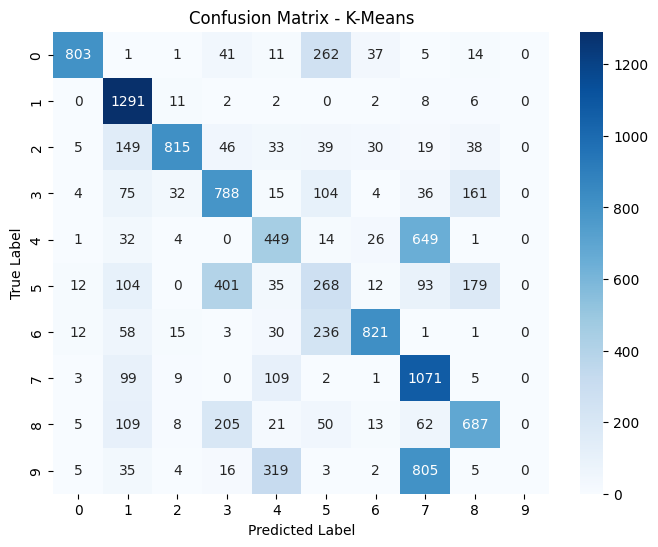

In [31]:
# Train and evaluate models
results = {}
for name, model in models.items():
    print(f"Training {name}...")

    if name == 'K-Means':
        # Fit and predict with K-Means
        model.fit(X_train_split)
        y_pred = model.predict(X_val)
        # Map K-Means clusters to labels using majority voting
        labels_map = {}
        for cluster in range(10):
            cluster_indices = np.where(y_pred == cluster)[0]
            true_labels = y_val.iloc[cluster_indices]
            most_common_label = true_labels.mode()[0]
            labels_map[cluster] = most_common_label

        y_pred_mapped = np.vectorize(labels_map.get)(y_pred)
    else:
        # Fit and predict for supervised models
        model.fit(X_train_split, y_train_split)
        y_pred_mapped = model.predict(X_val)

    # Accuracy and classification report
    accuracy = accuracy_score(y_val, y_pred_mapped)
    report = classification_report(y_val, y_pred_mapped, output_dict=True)
    conf_matrix = confusion_matrix(y_val, y_pred_mapped)

    # Store results
    results[name] = {
        'accuracy': accuracy,
        'precision': report['weighted avg']['precision'],
        'recall': report['weighted avg']['recall'],
        'f1-score': report['weighted avg']['f1-score']
    }
    # Print classification report
    print(f"\n{name} Accuracy: {accuracy:.4f}")
    print(classification_report(y_val, y_pred_mapped))


# Plot confusion matrix outside the loop
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.title(f'Confusion Matrix - {name}') # name will be the last model evaluated
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

Confusion Matrix - Logistic Regression:
[[1140    0    7    1    3    6    7    3    6    2]
 [   0 1283    9    3    2    5    1    3   13    3]
 [   3   18 1054   16   13    7   16   17   24    6]
 [   5    8   32 1087    1   37    2   10   21   16]
 [   1    2    5    3 1107    2   10    3    7   36]
 [  14    9   15   29    9  977   10    5   29    7]
 [   9    2   16    1   10   16 1118    1    4    0]
 [   5    8   17    8   10    2    0 1207    5   37]
 [  11   17   15   34    8   37   12    4 1008   14]
 [   6    5    6    9   25   11    0   37    9 1086]]


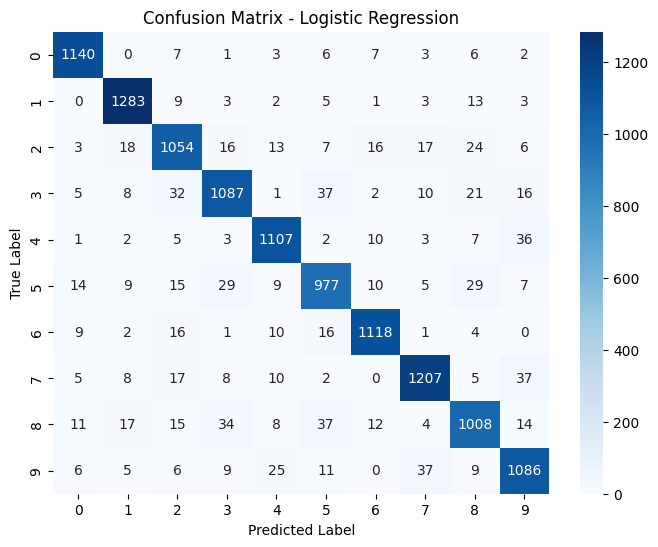

In [34]:
# Logistic Regression Confusion Matrix
logistic_model = LogisticRegression(max_iter=1000)
logistic_model.fit(X_train_split, y_train_split)
y_pred_logistic = logistic_model.predict(X_val)

# Generate and print confusion matrix for Logistic Regression
conf_matrix_logistic = confusion_matrix(y_val, y_pred_logistic)
print("Confusion Matrix - Logistic Regression:")
print(conf_matrix_logistic)

# Plot confusion matrix for Logistic Regression
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_logistic, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix - Logistic Regression')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

Confusion Matrix - ANN (MLP):
[[1161    0    2    0    1    1    3    1    5    1]
 [   1 1312    6    0    1    0    1    1    0    0]
 [   0    6 1151    3    2    0    1    7    3    1]
 [   1    0   11 1182    0   15    0    1    5    4]
 [   3    1    1    1 1156    0    1    1    0   12]
 [   3    0    1   11    5 1069    4    1    8    2]
 [   1    0    1    0    1    6 1164    0    4    0]
 [   0    2   10    1    3    0    0 1279    2    2]
 [   3    2    4    3    2    6    5    2 1127    6]
 [   6    0    1    2    8    3    1    6    3 1164]]


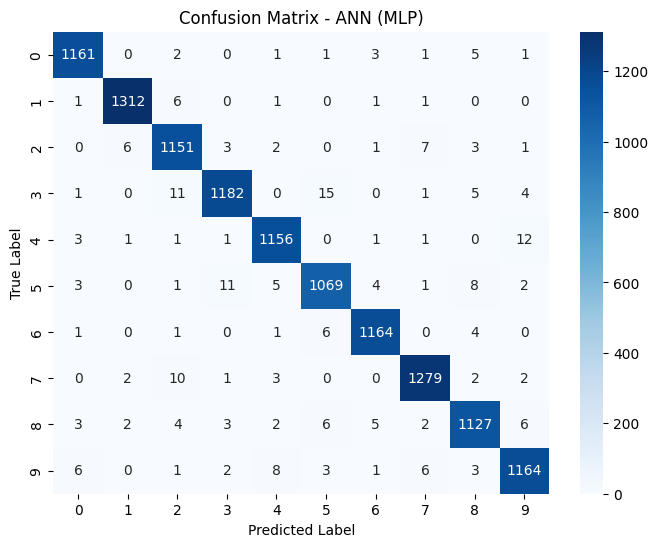

In [36]:

mlp_model = MLPClassifier(hidden_layer_sizes=(128, 64), max_iter=500)
mlp_model.fit(X_train_split, y_train_split)
y_pred_mlp = mlp_model.predict(X_val)

# Generate and print confusion matrix for ANN (MLP)
conf_matrix_mlp = confusion_matrix(y_val, y_pred_mlp)
print("Confusion Matrix - ANN (MLP):")
print(conf_matrix_mlp)

# Plot confusion matrix for ANN (MLP)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_mlp, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix - ANN (MLP)')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

In [32]:
# Compare models
results_df = pd.DataFrame(results).T
print("\nModel Comparison:")
print(results_df)


Model Comparison:
                     accuracy  precision   recall  f1-score
Logistic Regression   0.92225   0.922053  0.92225  0.922094
ANN (MLP)             0.97925   0.979328  0.97925  0.979247
K-Means               0.58275   0.563149  0.58275  0.555880


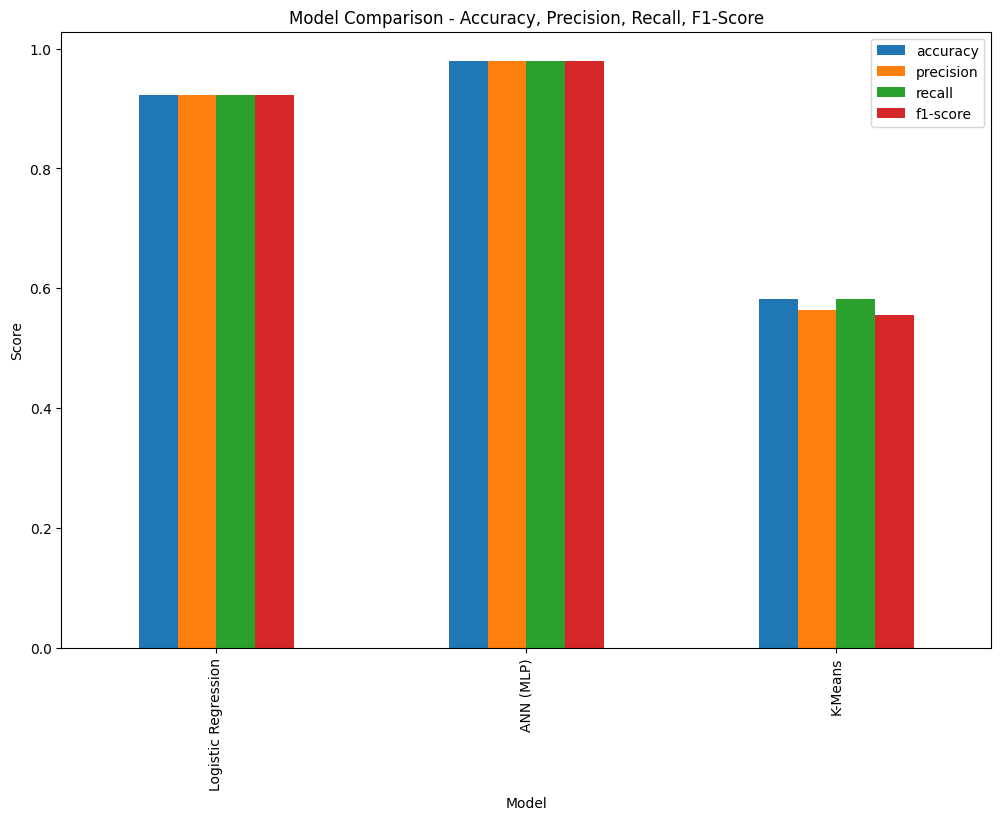

In [33]:

# Plot comparison
results_df.plot(kind='bar', figsize=(12, 8), title='Model Comparison - Accuracy, Precision, Recall, F1-Score')
plt.xlabel('Model')
plt.ylabel('Score')
plt.show()